# Feed-forward Neural Network

## Calculate Loss

[Sequential](https://pytorch.org/docs/stable/nn.html#sequential)

[Linear](https://pytorch.org/docs/stable/nn.html#linear)

[ReLU](https://pytorch.org/docs/stable/nn.html#relu)

[CrossEntropyLoss](https://pytorch.org/docs/stable/nn.html#crossentropyloss)

In [1]:
# Deep learning using the MINST Dataset
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
# Feed-forward network w/ Cross Entropy Loss
# We are not concluding the model with a softmax function in this case
# CrossEntropyLoss requires that we pass in the logits from the model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
# PyTorch expects us to label this as criterion
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3214, grad_fn=<NllLossBackward>)


[LogSoftmax](https://pytorch.org/docs/stable/nn.html#logsoftmax)

[NLLLoss](https://pytorch.org/docs/stable/nn.html#nlllosshttps://pytorch.org/docs/stable/nn.html#nllloss)

In [3]:
# Feed-forward network using LogSoftmax and NLLLoss
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      # Calculate the function across the cols
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3140, grad_fn=<NllLossBackward>)


# Calculate Gradient Step

[Optimum](https://pytorch.org/docs/stable/optim.html)

In [12]:
from torch import optim

# Feed-forward network using LogSoftmax and NLLLoss
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      # Calculate the function across the cols
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()
# Define the stochastic Gradient Descent optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)
# Clear out the parameters of the optimizer
optimizer.zero_grad()
# Backward pass
loss.backward()
# Gradient Step
optimizer.step()

print(loss.item())

2.2932515144348145


# Model Training

[SGD](https://pytorch.org/docs/stable/optim.html#algorithms)

In [2]:
import torch
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [27]:
from torch import optim

class Network(nn.Module):
    def __init__(self, epochs=5, learn_rate=0.003):
        super(Network, self).__init__()
        self.epochs = epochs
        # Feed-forward network using LogSoftmax and NLLLoss
        model = nn.Sequential(nn.Linear(784, 128),
                            nn.ReLU(),
                            nn.Linear(128, 64),
                            nn.ReLU(),
                            nn.Linear(64, 10),
                            # Calculate the function across the cols
                            nn.LogSoftmax(dim=1))
        # Define the loss
        criterion = nn.NLLLoss()
        # Define the stochastic Gradient Descent optimizer
        optimizer = optim.SGD(model.parameters(), lr=learn_rate)

    def forward(self, x):
        return self.model(x)
        
    def fit(self, trainloader):
        for e in range(epochs):
            running_loss = 0
            for images, labels in trainloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                # Clear out the parameters of the optimizer
                optimizer.zero_grad()
                # Forward pass
                output = forward(images)
                # Calculate the loss with the output and the labels
                loss = criterion(output, labels)
                # Backward pass
                loss.backward()
                # Gradient Step
                optimizer.step()
                
                running_loss += loss.item()
            else:
                print(f"Training loss: {running_loss/len(trainloader)}")



In [ ]:
n = Network()
n.fit(trainloader)

# Test Network
This uses the Handwriting MNIST dataset

In [40]:
import torch
from torchvision import datasets, transforms
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [41]:
from torch import optim
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

class Network(nn.Module):
    def __init__(self, epochs=5, learn_rate=0.003):
        super(Network, self).__init__()
        self.epochs = epochs
        # Feed-forward network using LogSoftmax and NLLLoss
        # 3 Hidden Layers and 1 Output Layer
        self.model = nn.Sequential(nn.Linear(784, 128),
                            nn.ReLU(),
                            nn.Linear(128, 64),
                            nn.ReLU(),
                            nn.Linear(64, 10),
                            # Calculate the function across the cols
                            nn.LogSoftmax(dim=1))
        # Define the loss
        self.criterion = nn.NLLLoss()
        # Define the stochastic Gradient Descent optimizer
        self.optimizer = optim.SGD(self.model.parameters(), lr=learn_rate)

    def forward(self, x):
        return self.model(x)
        
    def fit(self, trainloader):
        for e in range(self.epochs):
            running_loss = 0
            for images, labels in trainloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                # Clear out the parameters of the optimizer
                self.optimizer.zero_grad()
                # Forward pass
                output = self.forward(images)
                # Calculate the loss with the output and the labels
                loss = self.criterion(output, labels)
                # Backward pass
                loss.backward()
                # Gradient Step
                self.optimizer.step()
                running_loss += loss.item()
            else:
                print(f"Training loss: {running_loss/len(trainloader)}")

    def test(self, testloader):
        dataiter = iter(testloader)
        images, labels = dataiter.next()
        img = images[1]
        image = img.view(img.shape[0], -1)
        # Calculate the class probabilities (softmax) for img
        ps = torch.exp(self.model(image))

        # Plot the image and probabilities
        self.view(img, ps)

    def view(self, img, ps):
        """
        Function for viewing an image and it's predicted classes.
        """ 
        ps = ps.data.numpy().squeeze()

        fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
        ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
        ax1.axis('off')
        ax2.barh(np.arange(10), ps)
        ax2.set_aspect(0.1)
        ax2.set_yticks(np.arange(10))
        ax2.set_yticklabels(np.arange(10))
        ax2.set_title('Class Probability')
        ax2.set_xlim(0, 1.1)
        plt.tight_layout()

n = Network()

In [42]:
# Train your network
n.fit(trainloader)

Training loss: 1.8017592607403614
Training loss: 0.7581756500991931
Training loss: 0.5007483596041766
Training loss: 0.4191064518779071
Training loss: 0.37708733875804873


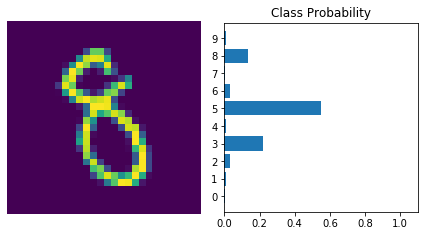

In [43]:
# Test your network
n.test(testloader)

# Add Layers
This uses the Fashion MNIST dataset

[Adam](https://pytorch.org/docs/stable/optim.html?highlight=optim.adam#torch.optim.Adam)

In [44]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [45]:
from torch import optim
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

class Network(nn.Module):
    def __init__(self, epochs=5, learn_rate=0.003):
        super(Network, self).__init__()
        self.epochs = epochs
        # Feed-forward network using LogSoftmax and NLLLoss
        self.model = nn.Sequential(nn.Linear(784, 256),
                            nn.ReLU(),
                            nn.Linear(256, 128),
                            nn.ReLU(),
                            nn.Linear(128, 64),
                            nn.ReLU(),
                            nn.Linear(64,10),
                            # Calculate the function across the cols
                            nn.LogSoftmax(dim=1))
        # Define the loss
        self.criterion = nn.NLLLoss()
        # Define the first-order gradient-based optimization of Stochastic Gradient Descent
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.003)

    def forward(self, x):
        return self.model(x)
        
    def fit(self, trainloader):
        for e in range(self.epochs):
            running_loss = 0
            for images, labels in trainloader:
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                # Clear out the parameters of the optimizer
                self.optimizer.zero_grad()
                # Forward pass
                output = self.forward(images)
                # Calculate the loss with the output and the labels
                loss = self.criterion(output, labels)
                # Backward pass
                loss.backward()
                # Gradient Step
                self.optimizer.step()
                running_loss += loss.item()
            else:
                print(f"Training loss: {running_loss/len(trainloader)}")

    def test(self, testloader):
        # Create an iterator on the test dataset
        dataiter = iter(testloader)
        # Collect the next record
        images, labels = dataiter.next()
        # Isolate a single image
        img = images[1]
        # Flatten the image
        image = img.view(img.shape[0], -1)
        # Calculate the class probabilities (softmax) for img
        ps = torch.exp(self.model(image))
        # Plot the image and probabilities
        self.view(img, ps)
        
    def view(self, img, ps):
        """
        Function for viewing an image and it's predicted classes.
        """ 
        ps = ps.data.numpy().squeeze()

        fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
        ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
        ax1.axis('off')
        ax2.barh(np.arange(10), ps)
        ax2.set_aspect(0.1)
        ax2.set_yticks(np.arange(10))
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
        ax2.set_title('Class Probability')
        ax2.set_xlim(0, 1.1)
        plt.tight_layout()

n = Network()

In [46]:
# Train your network
n.fit(trainloader)

Training loss: 0.5149985085259369
Training loss: 0.3910998878384958
Training loss: 0.35243977741328386
Training loss: 0.33067600842096656
Training loss: 0.31417459749114285


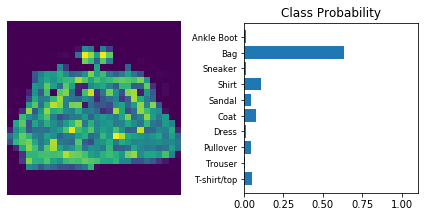

In [47]:
# Test your network
n.test(testloader)

# Validation

[topk](https://pytorch.org/docs/stable/tensors.html?highlight=topk#torch.Tensor.topk)

In [5]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download the test data
data = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

# Split the test data in half
testset, valset = torch.utils.data.random_split(data, [5000, 5000])

# Load the test and validation data
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [69]:
from torch import optim
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

class Network(nn.Module):
    def __init__(self, epochs=30, learn_rate=0.003):
        super(Network, self).__init__()
        self.epochs = epochs
        # Feed-forward network using LogSoftmax and NLLLoss
        self.model = nn.Sequential(nn.Linear(784, 256),
                            nn.ReLU(),
                            nn.Linear(256, 128),
                            nn.ReLU(),
                            nn.Linear(128, 64),
                            nn.ReLU(),
                            nn.Linear(64,10),
                            # Calculate the function across the cols
                            nn.LogSoftmax(dim=1))
        # Define the loss
        self.criterion = nn.NLLLoss()
        # Define the first-order gradient-based optimization of Stochastic Gradient Descent
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.003)

    def forward(self, x):
        return self.model(x)
        
    def fit(self, trainloader, valloader):
        # number of images trained on 
        trained_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()

        # Keep track of the rolling accuracy
        accuracy = 0

        # Keep track of the losses for train and validation datasets
        train_losses, val_losses = [], []
        for e in range(self.epochs):
            running_loss = 0
            for images, labels in trainloader:
                trained_so_far += len(labels)
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                # Clear out the parameters of the optimizer
                self.optimizer.zero_grad()
                # Forward pass
                output = self.forward(images)
                # Calculate the loss with the output and the labels
                loss = self.criterion(output, labels)
                # Backward pass
                loss.backward()
                # Gradient Step
                self.optimizer.step()
                running_loss += loss.item()
                

            else:
                # Compute the accuracy compared to our validation data
                val_loss = 0
                with torch.no_grad():
                    for images, labels in valloader:
                        # Flatten MNIST images into a 784 long vector
                        images = images.view(images.shape[0], -1)
                        # Forward pass
                        log_ps = self.forward(images)
                        # Calculate the loss with the output and the labels
                        val_loss += self.criterion(log_ps, labels)
                        # Calculate the accuracy of the loss
                        ps = torch.exp(log_ps)
                        # Get the largest probability values per record
                        top_p, top_class = ps.topk(1, dim=1)
                        # Compare to the list of Ground Truth
                        equals = top_class == labels.view(*top_class.shape)
                        # Since they are all 1s and 0s, we could just take the mean
                        accuracy += torch.mean(equals.float())

                train_losses.append(running_loss/len(trainloader))
                val_losses.append(val_loss/len(valloader))
                elapsed_time = float(time.time() - start)
                images_per_second = trained_so_far / elapsed_time if elapsed_time > 0 else 0
                
                print("Epoch: {}/{}.. ".format(e+1, self.epochs),
                    "Training loss: {:.3f}".format( running_loss/len(trainloader) ),
                    "Validation Loss: {:.3f}".format( val_loss/len(valloader) ),
                    "Speed(images/sec): {:.2f}".format( images_per_second ),
                    "Accuracy: {:.3f}".format(accuracy/len(valloader)))
        print("Total elapse time: {:.2f} seconds".format(float(time.time() - start)))
        plt.plot(train_losses, label='Training loss')
        plt.plot(val_losses, label='Validation loss')
        plt.legend(frameon=False)

    def test(self, testloader):
        running_loss = 0
        trained_so_far = 0
        accuracy = 0
        start = time.time()
        for images, labels in testloader:
            trained_so_far += len(labels)
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
            # Clear out the parameters of the optimizer
            self.optimizer.zero_grad()
            # Forward pass
            output = self.forward(images)
            # Calculate the loss with the output and the labels
            loss = self.criterion(output, labels)
            # Calculate the accuracy of the loss
            ps = torch.exp(output)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
            # Backward pass
            loss.backward()
            # Gradient Step
            self.optimizer.step()
            running_loss += loss.item()
        else:
            elapsed_time = float(time.time() - start)
            images_per_second = trained_so_far / elapsed_time if elapsed_time > 0 else 0
            
            print("Training loss: {:.3f}".format( running_loss/len(testloader) ),
                "Speed(images/sec): {:.2f}".format( images_per_second ),
                "Trained: {}".format( trained_so_far ),
                "Accuracy: {:.3f}".format(accuracy/len(testloader)))

    def score(self, loader):
        dataiter = iter(loader)
        images, labels = dataiter.next()
        img = images[1]
        image = img.view(img.shape[0], -1)
        # Calculate the class probabilities (softmax) for img
        ps = torch.exp(self.model(image))

        # Plot the image and probabilities
        self.view(img, ps)

    def view(self, img, ps):
        """
        Function for viewing an image and it's predicted classes.
        """ 
        ps = ps.data.numpy().squeeze()

        fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
        ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
        ax1.axis('off')
        ax2.barh(np.arange(10), ps)
        ax2.set_aspect(0.1)
        ax2.set_yticks(np.arange(10))
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
        ax2.set_title('Class Probability')
        ax2.set_xlim(0, 1.1)
        plt.tight_layout()

n = Network()

Epoch: 1/30..  Training loss: 0.515 Validation Loss: 0.475 Speed(images/sec): 4549.53 Accuracy: 0.831
Epoch: 2/30..  Training loss: 0.393 Validation Loss: 0.413 Speed(images/sec): 4455.27 Accuracy: 1.679
Epoch: 3/30..  Training loss: 0.359 Validation Loss: 0.398 Speed(images/sec): 4417.72 Accuracy: 2.532
Epoch: 4/30..  Training loss: 0.334 Validation Loss: 0.386 Speed(images/sec): 4437.25 Accuracy: 3.397
Epoch: 5/30..  Training loss: 0.317 Validation Loss: 0.394 Speed(images/sec): 4006.21 Accuracy: 4.259
Epoch: 6/30..  Training loss: 0.309 Validation Loss: 0.413 Speed(images/sec): 4067.71 Accuracy: 5.114
Epoch: 7/30..  Training loss: 0.294 Validation Loss: 0.350 Speed(images/sec): 4108.91 Accuracy: 5.992
Epoch: 8/30..  Training loss: 0.281 Validation Loss: 0.441 Speed(images/sec): 4002.53 Accuracy: 6.844
Epoch: 9/30..  Training loss: 0.278 Validation Loss: 0.409 Speed(images/sec): 3693.00 Accuracy: 7.708
Epoch: 10/30..  Training loss: 0.270 Validation Loss: 0.409 Speed(images/sec): 348

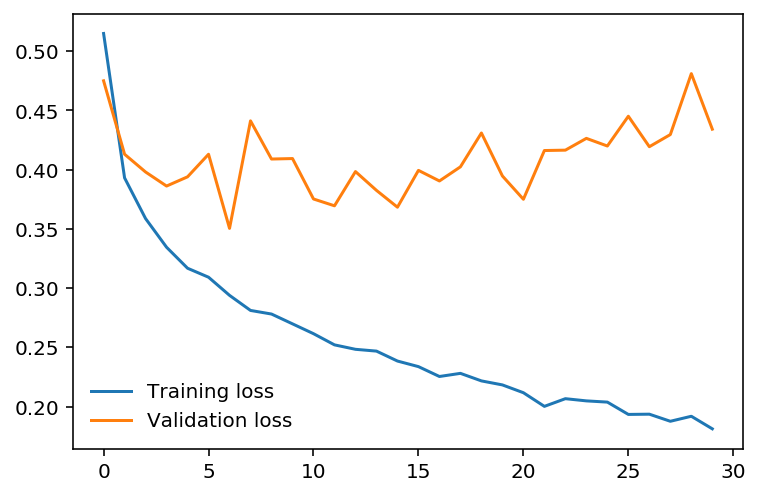

In [70]:
# Train your network
n.fit(trainloader, valloader)

In [71]:
# Test your network
n.test(testloader)

Training loss: 0.383 Speed(images/sec): 4243.32 Trained: 5000 Accuracy: 0.873


# Dropout

[Dropout](https://pytorch.org/docs/stable/nn.html?highlight=nn.dropout#torch.nn.Dropout)

In [2]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download the test data
data = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

# Split the test data in half
testset, valset = torch.utils.data.random_split(data, [5000, 5000])

# Load the test and validation data
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [3]:
from torch import optim
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

class Network(nn.Module):
    def __init__(self, epochs=30, learn_rate=0.003):
        super(Network, self).__init__()
        self.epochs = epochs
        # Feed-forward network using LogSoftmax and NLLLoss
        self.model = nn.Sequential(nn.Linear(784, 256),
                            nn.ReLU(),
                            # 20% Chance of drop out
                            nn.Dropout(p=0.2),
                            nn.Linear(256, 128),
                            nn.ReLU(),
                            # 20% Chance of drop out
                            nn.Dropout(p=0.2),
                            nn.Linear(128, 64),
                            nn.ReLU(),
                            # 20% Chance of drop out
                            nn.Dropout(p=0.2),
                            nn.Linear(64,10),
                            # Calculate the function across the cols
                            nn.LogSoftmax(dim=1))
        # Define the loss
        self.criterion = nn.NLLLoss()
        # Define the first-order gradient-based optimization of Stochastic Gradient Descent
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.003)

    def forward(self, x):
        return self.model(x)
        
    def fit(self, trainloader, valloader):
        # number of images trained on 
        trained_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()

        # Keep track of the rolling accuracy
        accuracy = 0

        # Keep track of the losses for train and validation datasets
        train_losses, val_losses = [], []
        for e in range(self.epochs):
            running_loss = 0
            for images, labels in trainloader:
                trained_so_far += len(labels)
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                # Clear out the parameters of the optimizer
                self.optimizer.zero_grad()
                # Forward pass
                output = self.forward(images)
                # Calculate the loss with the output and the labels
                loss = self.criterion(output, labels)
                # Backward pass
                loss.backward()
                # Gradient Step
                self.optimizer.step()
                running_loss += loss.item()
                

            else:
                # Compute the accuracy compared to our validation data
                val_loss = 0
                with torch.no_grad():
                    # Set model to evaluation mode
                    self.model.eval()
                    for images, labels in valloader:
                        # Flatten MNIST images into a 784 long vector
                        images = images.view(images.shape[0], -1)
                        # Forward pass
                        log_ps = self.forward(images)
                        # Calculate the loss with the output and the labels
                        val_loss += self.criterion(log_ps, labels)
                        # Calculate the accuracy of the loss
                        ps = torch.exp(log_ps)
                        # Get the largest probability values per record
                        top_p, top_class = ps.topk(1, dim=1)
                        # Compare to the list of Ground Truth
                        equals = top_class == labels.view(*top_class.shape)
                        # Since they are all 1s and 0s, we could just take the mean
                        accuracy += torch.mean(equals.float())
                # Set the model back to train mode
                self.model.train()
                train_losses.append(running_loss/len(trainloader))
                val_losses.append(val_loss/len(valloader))
                elapsed_time = float(time.time() - start)
                images_per_second = trained_so_far / elapsed_time if elapsed_time > 0 else 0
                
                print("Epoch: {}/{}.. ".format(e+1, self.epochs),
                    "Training loss: {:.3f}".format( running_loss/len(trainloader) ),
                    "Validation Loss: {:.3f}".format( val_loss/len(valloader) ),
                    "Speed(images/sec): {:.2f}".format( images_per_second ),
                    "Accuracy: {:.3f}".format(accuracy/len(valloader)))
                
        print("Total elapse time: {:.2f} seconds".format(float(time.time() - start)))
        plt.plot(train_losses, label='Training loss')
        plt.plot(val_losses, label='Validation loss')
        plt.legend(frameon=False)

    def test(self, testloader):
        running_loss = 0
        trained_so_far = 0
        accuracy = 0
        start = time.time()
        with torch.no_grad():
            # Set model to evaluation mode
            self.model.eval()
            for images, labels in testloader:
                trained_so_far += len(labels)
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                # Clear out the parameters of the optimizer
                self.optimizer.zero_grad()
                # Forward pass
                output = self.forward(images)
                # Calculate the loss with the output and the labels
                loss = self.criterion(output, labels)
                # Calculate the accuracy of the loss
                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                running_loss += loss.item()
            else:
                elapsed_time = float(time.time() - start)
                images_per_second = trained_so_far / elapsed_time if elapsed_time > 0 else 0
                
                print("Training loss: {:.3f}".format( running_loss/len(testloader) ),
                    "Speed(images/sec): {:.2f}".format( images_per_second ),
                    "Trained: {}".format( trained_so_far ),
                    "Accuracy: {:.3f}".format(accuracy/len(testloader)))
        # Set the model back to train mode
        self.model.train()

    def score(self, loader):
        dataiter = iter(loader)
        images, labels = dataiter.next()
        img = images[1]
        image = img.view(img.shape[0], -1)
        # Calculate the class probabilities (softmax) for img
        ps = torch.exp(self.model(image))

        # Plot the image and probabilities
        self.view(img, ps)

    def view(self, img, ps):
        """
        Function for viewing an image and it's predicted classes.
        """ 
        ps = ps.data.numpy().squeeze()

        fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
        ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
        ax1.axis('off')
        ax2.barh(np.arange(10), ps)
        ax2.set_aspect(0.1)
        ax2.set_yticks(np.arange(10))
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
        ax2.set_title('Class Probability')
        ax2.set_xlim(0, 1.1)
        plt.tight_layout()

n = Network()

In [4]:
# Train your network
n.fit(trainloader, valloader)

Exception ignored in: <function Image.__del__ at 0x7fb8f5da37a0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py", line 630, in __del__
    self.__exit__()
KeyboardInterrupt
Epoch: 1/30..  Training loss: 0.612 Validation Loss: 0.483 Speed(images/sec): 4210.13 Accuracy: 0.830


In [ ]:
# Test your network
n.test(testloader)

In [ ]:
# Predict
n.score(testloader)

So as we can see between the two models, using dropout has a major effect on the outcomme. The previous model had an accuracy of predicting the correct output from the test data at 87.3%, while the model using Dropout had an accuracy of predicting the correct output from the test data at 87%. While it seems like the accuracy dropped a bit, that is okay because this reduces overfitting and will be more flexible with new input data.

# Saving and Loading Models

[Save](https://pytorch.org/docs/stable/torch.html?highlight=torch.save#torch.save)

[Load](https://pytorch.org/docs/stable/torch.html?highlight=torch.load#torch.load)

In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download the test data
data = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

# Split the test data in half
testset, valset = torch.utils.data.random_split(data, [5000, 5000])

# Load the test and validation data
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [2]:
from torch import optim
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

class Network(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, drop_p=0.2, epochs=30, learn_rate=0.003):
        super(Network, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_layers = hidden_layers
        self.epochs = epochs
        # Feed-forward network using LogSoftmax and NLLLoss
        self.model = nn.Sequential(nn.Linear(input_size, hidden_layers[0]),
                            nn.ReLU(),
                            # 20% Chance of drop out
                            nn.Dropout(p=drop_p),
                            nn.Linear(hidden_layers[0], hidden_layers[1]),
                            nn.ReLU(),
                            # 20% Chance of drop out
                            nn.Dropout(p=drop_p),
                            nn.Linear(hidden_layers[1], hidden_layers[2]),
                            nn.ReLU(),
                            # 20% Chance of drop out
                            nn.Dropout(p=drop_p),
                            nn.Linear(hidden_layers[2],output_size),
                            # Calculate the function across the cols
                            nn.LogSoftmax(dim=1))
        # Define the loss
        self.criterion = nn.NLLLoss()
        # Define the first-order gradient-based optimization of Stochastic Gradient Descent
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.003)

    def forward(self, x):
        return self.model(x)
        
    def fit(self, trainloader, valloader):
        # number of images trained on 
        trained_so_far = 0

        # Remember when we started for printing time statistics
        start = time.time()

        # Keep track of the rolling accuracy
        accuracy = 0

        # Keep track of the losses for train and validation datasets
        train_losses, val_losses = [], []
        for e in range(self.epochs):
            running_loss = 0
            for images, labels in trainloader:
                trained_so_far += len(labels)
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                # Clear out the parameters of the optimizer
                self.optimizer.zero_grad()
                # Forward pass
                output = self.forward(images)
                # Calculate the loss with the output and the labels
                loss = self.criterion(output, labels)
                # Backward pass
                loss.backward()
                # Gradient Step
                self.optimizer.step()
                running_loss += loss.item()
                

            else:
                # Compute the accuracy compared to our validation data
                val_loss = 0
                with torch.no_grad():
                    # Set model to evaluation mode
                    self.model.eval()
                    for images, labels in valloader:
                        # Flatten MNIST images into a 784 long vector
                        images = images.view(images.shape[0], -1)
                        # Forward pass
                        log_ps = self.forward(images)
                        # Calculate the loss with the output and the labels
                        val_loss += self.criterion(log_ps, labels)
                        # Calculate the accuracy of the loss
                        ps = torch.exp(log_ps)
                        # Get the largest probability values per record
                        top_p, top_class = ps.topk(1, dim=1)
                        # Compare to the list of Ground Truth
                        equals = top_class == labels.view(*top_class.shape)
                        # Since they are all 1s and 0s, we could just take the mean
                        accuracy += torch.mean(equals.float())
                # Set the model back to train mode
                self.model.train()
                train_losses.append(running_loss/len(trainloader))
                val_losses.append(val_loss/len(valloader))
                elapsed_time = float(time.time() - start)
                images_per_second = trained_so_far / elapsed_time if elapsed_time > 0 else 0
                
                print("Epoch: {}/{}.. ".format(e+1, self.epochs),
                    "Training loss: {:.3f}".format( running_loss/len(trainloader) ),
                    "Validation Loss: {:.3f}".format( val_loss/len(valloader) ),
                    "Speed(images/sec): {:.2f}".format( images_per_second ),
                    "Accuracy: {:.3f}".format(accuracy/len(valloader)))
                
        print("Total elapse time: {:.2f} seconds".format(float(time.time() - start)))
        plt.plot(train_losses, label='Training loss')
        plt.plot(val_losses, label='Validation loss')
        plt.legend(frameon=False)

    def test(self, testloader):
        running_loss = 0
        trained_so_far = 0
        accuracy = 0
        start = time.time()
        with torch.no_grad():
            # Set model to evaluation mode
            self.model.eval()
            for images, labels in testloader:
                trained_so_far += len(labels)
                # Flatten MNIST images into a 784 long vector
                images = images.view(images.shape[0], -1)
                # Clear out the parameters of the optimizer
                self.optimizer.zero_grad()
                # Forward pass
                output = self.forward(images)
                # Calculate the loss with the output and the labels
                loss = self.criterion(output, labels)
                # Calculate the accuracy of the loss
                ps = torch.exp(output)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                running_loss += loss.item()
            else:
                elapsed_time = float(time.time() - start)
                images_per_second = trained_so_far / elapsed_time if elapsed_time > 0 else 0
                
                print("Training loss: {:.3f}".format( running_loss/len(testloader) ),
                    "Speed(images/sec): {:.2f}".format( images_per_second ),
                    "Trained: {}".format( trained_so_far ),
                    "Accuracy: {:.3f}".format(accuracy/len(testloader)))
        # Set the model back to train mode
        self.model.train()

    def score(self, loader):
        dataiter = iter(loader)
        images, labels = dataiter.next()
        img = images[1]
        image = img.view(img.shape[0], -1)
        # Calculate the class probabilities (softmax) for img
        ps = torch.exp(self.model(image))

        # Plot the image and probabilities
        self.view(img, ps)

    def view(self, img, ps):
        """
        Function for viewing an image and it's predicted classes.
        """ 
        ps = ps.data.numpy().squeeze()

        fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
        ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
        ax1.axis('off')
        ax2.barh(np.arange(10), ps)
        ax2.set_aspect(0.1)
        ax2.set_yticks(np.arange(10))
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
        ax2.set_title('Class Probability')
        ax2.set_xlim(0, 1.1)
        plt.tight_layout()

    def save_checkpoint(self, filepath='checkpoint.pth'):
        checkpoint = {'input_size': self.input_size,
                    'output_size': self.output_size,
                    'hidden_layers': self.hidden_layers,
                    'state_dict': self.model.state_dict()}
        torch.save(checkpoint, filepath)

    def load_checkpoint(filepath='checkpoint.pth'):
        checkpoint = torch.load(filepath)
        model = Network(checkpoint['input_size'],
                        checkpoint['output_size'],
                        checkpoint['hidden_layers'])
        model.load_state_dict(checkpoint['state_dict'], strict=False)
        return model

n = Network(784, 10, [256, 128, 64])

Epoch: 1/30..  Training loss: 0.602 Validation Loss: 0.494 Speed(images/sec): 4513.93 Accuracy: 0.819
Epoch: 2/30..  Training loss: 0.475 Validation Loss: 0.466 Speed(images/sec): 4472.53 Accuracy: 1.653
Epoch: 3/30..  Training loss: 0.454 Validation Loss: 0.436 Speed(images/sec): 4451.01 Accuracy: 2.495
Epoch: 4/30..  Training loss: 0.433 Validation Loss: 0.416 Speed(images/sec): 4434.76 Accuracy: 3.349
Epoch: 5/30..  Training loss: 0.419 Validation Loss: 0.415 Speed(images/sec): 4423.33 Accuracy: 4.201
Epoch: 6/30..  Training loss: 0.410 Validation Loss: 0.409 Speed(images/sec): 4410.86 Accuracy: 5.055
Epoch: 7/30..  Training loss: 0.407 Validation Loss: 0.402 Speed(images/sec): 4398.19 Accuracy: 5.914
Epoch: 8/30..  Training loss: 0.400 Validation Loss: 0.412 Speed(images/sec): 4390.16 Accuracy: 6.770
Epoch: 9/30..  Training loss: 0.390 Validation Loss: 0.394 Speed(images/sec): 4366.95 Accuracy: 7.624
Epoch: 10/30..  Training loss: 0.392 Validation Loss: 0.399 Speed(images/sec): 433

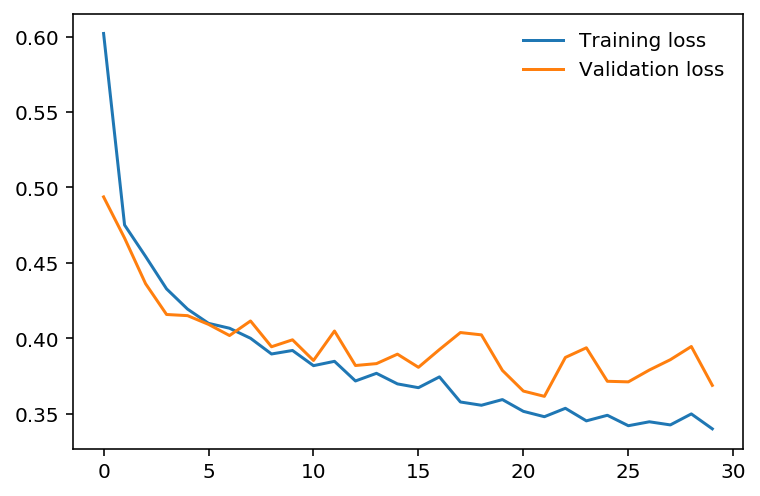

In [3]:
# Train your network
n.fit(trainloader, valloader)

In [4]:
# Test your network
n.test(testloader)

Training loss: 0.369 Speed(images/sec): 5906.98 Trained: 5000 Accuracy: 0.874


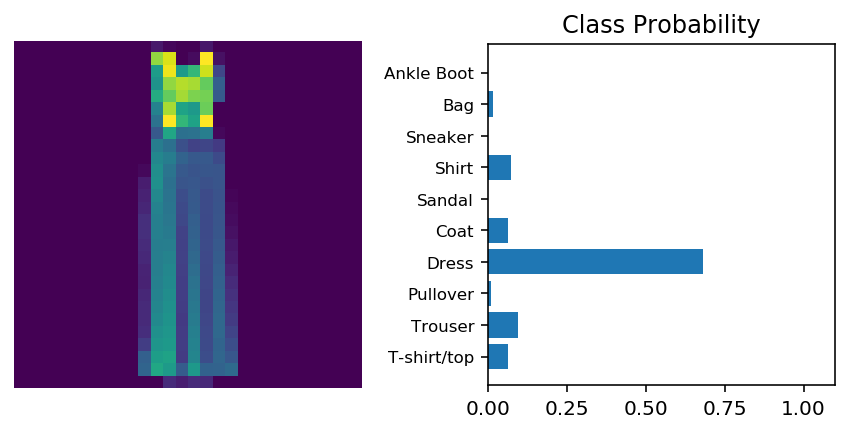

In [5]:
# Predict
n.score(testloader)

In [6]:
n.save_checkpoint()

In [7]:
m = Network.load_checkpoint()

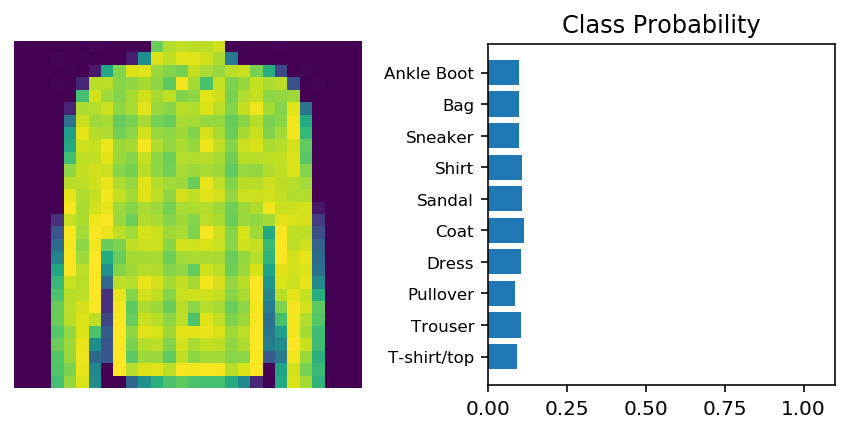

In [8]:
# Predict
m.score(testloader)